<font size=7><b>Introduction to Organoid Experiments

For this class, your group will be running a stimulation experiment on a connectoid. This notebook explains what a connectoid is and shows some basic analysis that can be done on them. It then explains how to construct a stimulation experiment. Then, in the exercises, your group will construct an experiment. The experiment you create will then be run on living human brain tissue! After the experiment is over, your final project will be to analyze the results of your experiment. The data that you'll receive back to analyze will be in the same format as the dataset used in this notebook. Thus, if you want to get a head start on analysis, you can use the provided data as a starting point.

<font color="red"><b>Note:</b> This HW is **due Tuesday (May 16), at 11:59pm**. This is a group assignment. Have only **1 team member** submit the assignment. Think very carefully about what you propose as your experiment. Be conservative on what you try to attempt. Once you submit, there's no going back!

In [2]:
%run "Experiment_Source_Code.ipynb"

Loading ./data/ephys/2022-04-28-e-/derived/kilosort2/Trace_20220428_15_52_47_chip11350_curated.zip


# Reading Material 

You will be required to devise your own experiment for this HW assignment. We highly reccomend that you read through some of the suggested papers below for inspiration and guidance. Many of these papers are from Potter's lab. He was an early pioneer in MEA stimulation. The "Neurons playing pong" paper is a fun read, albeit whimsical.

**Experiment Reference Papers**
* [Stimulation Reference](reading_material/Stimulation_Reference.pdf)
* [Searching for Neural Plasticity](reading_material/Searching_for_Plasticity.pdf)
* [Maxwell Device Specs](reading_material/Maxwell_MaxOne_Specs.pdf)
* [Tetanus Induces Network Depression](reading_material/Tetanus_Induced_Depression.pdf)
* [Stimulation Avoidance Plasticity](reading_material/Stimulation_Avoidance_Plasticity.pdf)
* [Closed Loop Control of Neural Bursting](reading_material/Tal_Neural_Circuitry.pdf) 
* [Stim Artifact Supression](reading_material/Artifact_Supression.pdf)
* [Neurons Play Pong](reading_material/neuronal_pong.pdf)
* [Connectoid Summary](reading_material/Assembloid_Summary.pdf)


**Other Reading Material**
* [cerebral organoid wiki](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.) - a basic summary
* [Maxwell Website](https://www.mxwbio.com/technology/?gclid=Cj0KCQjwr82iBhCuARIsAO0EAZw9HkpNG65Ot-iM4ZKitSkEYj4utIb3EXS6lGWZbp6G9ABrDn2UChEaAsy8EALw_wcB)- info about MEA we use
* [Maxwell Organoid Brochure](reading_material/Maxwell_Organoids.pdf)- summary of organoids on MaxOne
* [Spikesorting Wiki](https://en.wikipedia.org/wiki/Spike_sorting) - contains great video
* [Spikesorting Scholarpedia](http://www.scholarpedia.org/article/Spike_sorting) - More in depth
* [Spike Train Analysis](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony)- great for learning new methods
* [Neural Circuitry Paper](reading_material/Tal_Neural_Circuitry.pdf)- thorough neural latency analysis
* [Action Potential Wiki](https://en.wikipedia.org/wiki/Action_potential)- how a neuron fires

# Connectoids

You will be running your experiment on a new type of brain tissue currently being developed in the Haussler lab. This tissue is call a **connectoid**. It is created by growing two [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.) close to each other. The two organoids will then, miraculously, grow projections of neural tissue toward eachother. When the projections from the two organoids connect, a connectoid is born. We believe that connectoids express more complex and interesting communication patterns than what is seen in traditional organoids.

This technology is the cutting edge of science, so there are very few papers to read on it. The [Pasca assembloid summary](http://54.183.203.115:8888/files/work/Experiment/reading_material/Assembloid_Summary.pdf) is a good paper about similar types of neural cultures ([original paper link](https://www.nature.com/articles/nature25032)).

![alt text](data/connectoid.png "Title")

## Multi Electrode Arrays

In the reading from the previous homework you learned about a new technology called a high density CMOS multi-electrode array, which uses thousands of microscopic electrodes to record neural activity from tissue. Specifically, Prof. Tal Sharf used the, [Maxwell Biosystems, Maxone MEA](https://www.mxwbio.com/technology/?gclid=Cj0KCQjwr82iBhCuARIsAO0EAZw9HkpNG65Ot-iM4ZKitSkEYj4utIb3EXS6lGWZbp6G9ABrDn2UChEaAsy8EALw_wcB) to perform his Diazepam experiment. [Maxwell has a brochure](http://54.183.203.115:8888/files/work/Experiment/reading_material/Maxwell_Organoids.pdf) summarizing organoid experiments on the MaxOne.

For our expirement, there is a small rectangular surface on the MaxOne where we place the connectoid. This surface contains over 20,0000 electrodes. From this, we can select about 1,000 electrodes to record from for the experiment. The electrophysiologist running the experiment carefully selects which electrodes the want to record from. Specifically, they want to choose electrodes that are touching the neural tissue, so that they can record as much neural activity as possible. Below is the electrode layout used in a connectoid experiment. Notice that there are two big clumps of electrodes. The clumps are where the bodies of the two organoids are located.

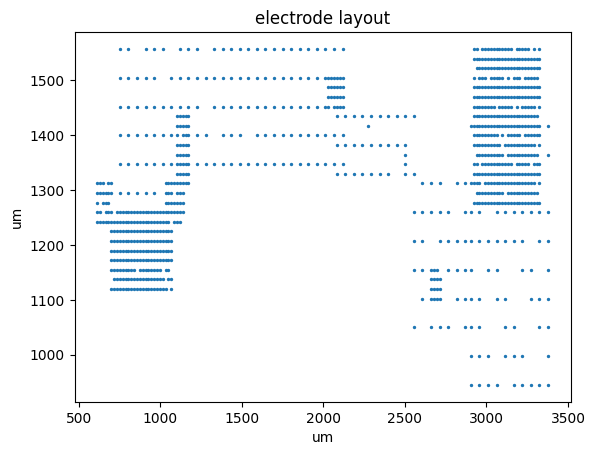

In [2]:
electrodeLayout()

In [3]:
electrode_mapping

,channel,electrode,x,y
0,0,15876,630.0,1260.0
1,1,18876,3080.0,1487.5
2,2,15900,1050.0,1260.0
3,3,17567,3272.5,1382.5
4,4,15235,962.5,1207.5
...,...,...,...,...
929,1019,17083,2502.5,1347.5
930,1020,18339,1382.5,1452.5
931,1021,18875,3062.5,1487.5
932,1022,19686,1855.0,1557.5


## Neural Units 

In the previous homework you were provided a Spike Raster, a matrix which tells you at what moment each neuron fires. How do we go from talking about raw signals recorded from 1,000 electrodes, to the spiking times of some 100 neurons? The complicated question is an active area of research in neuroscience called [spike sorting](http://www.scholarpedia.org/article/Spike_sorting). There is a [great video](https://en.wikipedia.org/wiki/Spike_sorting) on wikipedia about spikesorting. Spikesorting doesn't yet produce perfect results, so scientists still have to manually curate results. Curating spikesorted results was one of the exercises you did in the last homework. We don't actually know if the results from spikesorting are truly individual neurons (it's unlikely they are). For this reason, the outputted "neurons" from spikesorting are usually called *putative neurons* or *neural units*.

Below we see the same electrode layout as before, but this time there are red dots on it. These red dots are the places where a spikesorting algorithm believes neurons are located. Notice that there are two big clumps of neurons, one for each organoid.

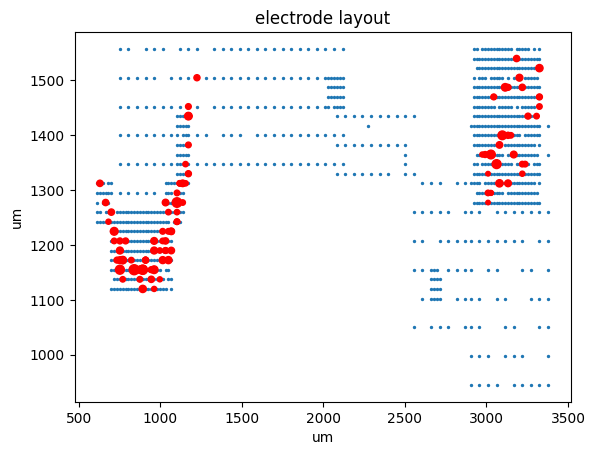

In [4]:
neuronLayout()

<p>&nbsp</p>

<center><b>Spike Sorting Diagram</b></center>

![alt text](http://www.scholarpedia.org/w/images/thumb/a/a6/QQ_Fig1.jpg/400px-QQ_Fig1.jpg "Title") 

# Dynamics 

Now that we know what a connectoid is, and what it looks like on an MEA, let's briefly consider how one might analyse its neural dynamics. Please note, below we are providing only the most rudimentary analysis techniques. A considerable portion of your final project will be to construct your own analysis approach on the resulting data from your experiment. Think deeply about what your analysis will be, and practice ideas on the example dataset provided in this notebook.

## STTC 

In the last HW we learned how the Spike Time Tiling Coefficient (STTC) is a measure that is similar to correlation, except with values from [0,1] instead of [-1,1]. It tells us the degree to which two neurons fire together. How could we use the STTC to check the degree to which the two organoids in our connectoid are communicating between each other and within themselves?

Below is a simple interactive graphic that considers this question. In the left graph, a line is drawn between all pairs of neural units whose STTC is above some threshold. The right graph is almost the standard STTC matrix, but it displays only STTC values that are above the threshold. Notice that as you increase threshold that the STTC must be above, the number of lines disapear from the graph. Notice also that the lines between the the two organoids disappear first (threshold$\approx$0.5), and then, later, disappear between neurons within the same organoid (threshold$\approx$0.8). This makes logical sense. We expect there to be stronger communication between neurons that are close to eachother, inside the same organoid. Neurons that are in two different organoids most likely have weaker communication between eachother.

$$
\textbf{IF:}\:\text{STTC}_{i,j}>\text{threshold},\quad\textbf{THEN:}\:\text{DrawLine}_{i,j} \quad \forall i,j\in\{\text{selected neurons}\}
$$

In [6]:
interact_manual( sttcLayout, threshold=(0,1,.1) )


interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0), Button(description='Run Intera…

<function __main__.sttcLayout(threshold)>

## Latencies

Using the STTC we learned a way to measure the degree to which to neurons fire together. But is there actually any degree of communication between the neurons? On way to parse out this question is to see if one neuron consistently fires before the other. This is done by using a measurement called **spike time latency**, or latencies for short. 

Suppose we want to calculate the latency between some spike on a neuron ($n_1$) compared to another neuron ($n_2$). The latency is calculated by measuring the duration of time in between the spike of $n_1$ and the closest occuring spike from $n_2$. If the $n_1$ spike occures before the $n_2$ spike this distance is positive, otherwise, the distance is negative. Doing this for all the spikes of $n_1$ we can create a histogram of the latencies between two neurons. if the histogram has mostly positive values, or mostly negative values, then we have a general notion of the direction of "information flow".

The interactive graphic below plots a histogram of the latencies between any two neural units. Try running the widget with $n_1=69$ and $n_2=38$. Notice that these two neurons that are located close to eachother have latencies that are screwed negatively. Now make $n_1=38$ and $n_2=69$. Notice that the latencies are now scewed positively.

In [7]:
interact_manual( latencyPlots,  neuron1=(0,100), neuron2=(0,100) )

interactive(children=(IntSlider(value=50, description='neuron1'), IntSlider(value=50, description='neuron2'), …

<function __main__.latencyPlots(neuron1, neuron2)>

# Neural Stimulation

For your experiment, you will be sending electrical signals to neurons that are in the connectoid. When the neurons receive these electrical signals it causes them to fire. That is why this process is called **Neural Stimulation**. Making neurons fire over and over again at specific times can permanently change the firing patter of the neuron. This process is called **Neural Plasticity**.

## What is a Stimulation Pulse?

A stimulation pulse occures when we use one of the electrodes on the MEA to change the voltage for a short period of time. This change in voltage only affects neurons in the immediate vicinity of the voltage change. Below is a plot of the most common type of stimulation pulse we use for experiments. This type of pulse is called a **square wave**. We raise the voltage 150mv and then lower it by 150mv, before bringing the voltage back to the resting state. In total, this pulse take 200$\mu$s from start to finish. Note that $\mu$s means microseconds, where there are 1000 microseconds in a millisecond. Notice that this pulse resembles the change in mV seen when a  [neuron spikes](https://en.wikipedia.org/wiki/Action_potential).

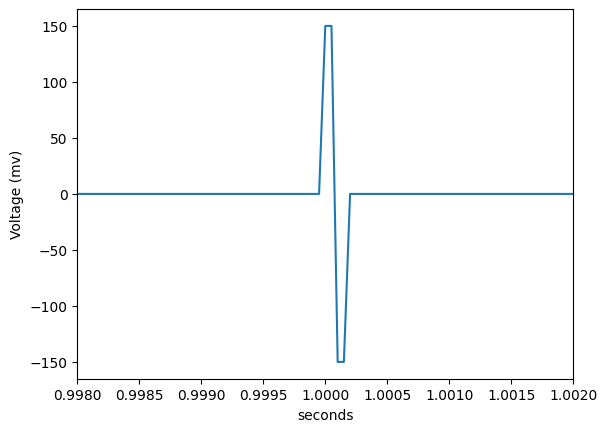

In [7]:
plotPulse()

## Experiment Setup

For your experiment, you will be allowed to stimulate neural tissue for a grand total of **5 minutes**. In this experiment you will have the oppertunity to choose **3 different neural units** to stimulate according to your protocol, however, you do not have to stimulate all of them. You can choose the general location of the neural units across **2** organoids of a connectoid. For example you could say *"choose 2 electrodes in close proximity on organoid A, and 1 electrode on organoid B"*.

Once the experiment has been completed you will receive **3 files** that are in the same format as the connectoid dataset in this notebook. There will be a 5 minute **pre-stimulation** dataset, a 5 minute **stimulation** dataset and a 15 minute **post-stimulation** dataset. These are the datasets that you will analyze for you final project.

## Create a Stim Pattern 

You will be required to write code that programmatically dictates your stim protocol. Through code, you will define a simple stimulation sequence, then you will specify how often this stimulation sequence occures. Below is an example of a simple stim protocol that stimulates 2 different neural unites $n_0$ and $n_1$.

In [8]:
stim_pattern = []
stim_pattern.append(('stim',[0],100,200))
stim_pattern.append(('delay',200))
stim_pattern.append(('stim',[1],150,300))
signal,t = create_stim_pulse_sequence(stim_pattern, freq_Hz=2)

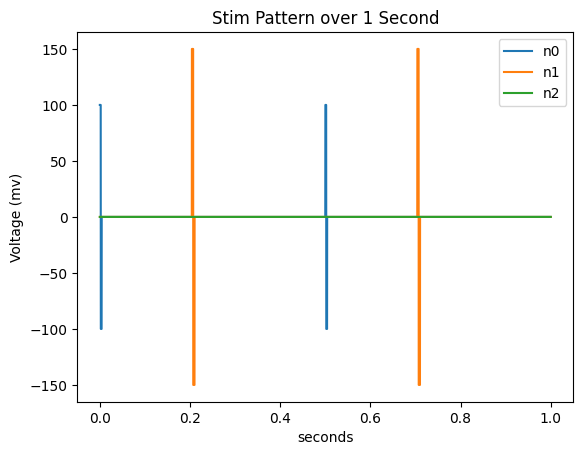

In [9]:
plotStimPattern(signal,t)

In this protocol. $n_0$ is stimulated at 100mV for 200$\mu$s. We wait 200ms. Then $n_1$ is stimulated at 150mv for 300$\mu$s. This protocol is repeated at a frequency of 2Hz, which means that the stim pattern occurs twice a second. Below is a slightly more complicated stimulation protocol.

In [10]:
stim_pattern = []
stim_pattern.append(('stim',[0,1,2],150,200))
stim_pattern.append(('delay',5))
stim_pattern.append(('stim',[1],150,200))
stim_pattern.append(('delay',15))
stim_pattern.append(('stim',[0,2],150,200))
signal,t = create_stim_pulse_sequence(stim_pattern, freq_Hz=10)

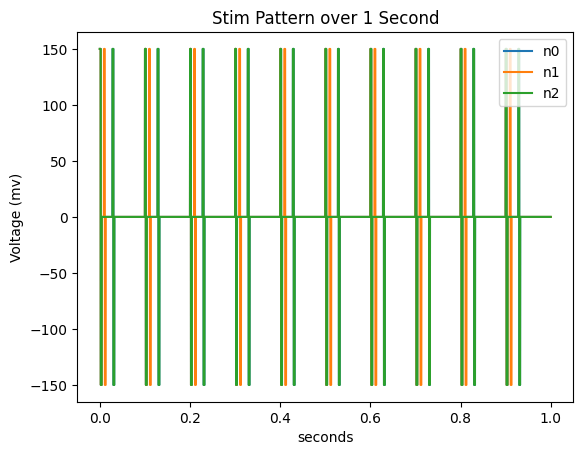

In [11]:
plotStimPattern(signal,t)

This time, there are **3** neural units being stimulated, $n_0$, $n_1$, $n_2$. First, all 3 unites are stimulated at 150mV for 200$\mu$s. Then there is a 5ms delay. Afterwards, $n_1$ is stimulated at 150mV for 200$\mu$s. Then there is a 15ms delay. Finally, $n_0$ and $n_2$ are stimulated at 150mV for 200$\mu$s. This pattern is repeated 10 times a second (10Hz). Notice that becase these simulation patterns are overlapping, we do no see the blue stimulus pattern of $n_0$ above. To ensure that $n_0$ is being stimulated, and that are stimulation protocol is correct. we can graph the stimulation patterns for each neural unit individually.

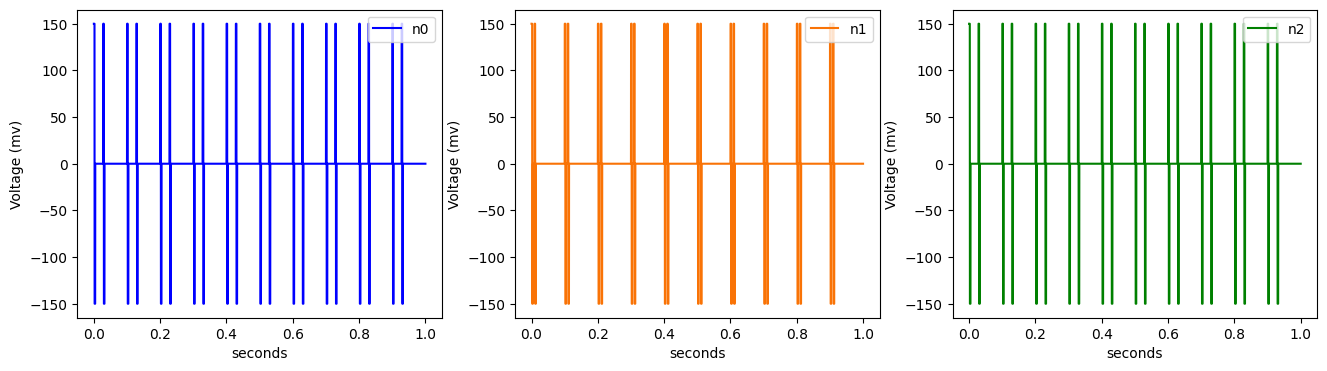

In [12]:
plotIndividualPatterns(signal,t)

You stimulation protocl that you select for your experiment must be able to be code with the methodology described above. You may notice, and be dismayed, that this methodology of constructing stim patterns limitis the experimental procedures you can implement. This is intentional. We want to ensure that you create a simple experiment whose data is analyzable for your final project. Note that if you create a stim pattern that is too long, and fires at a slower frequency than what you set as the repeat frequency (Hz), you will get an error. This, again, reduces the complexity of experiments you can perform.

In [13]:
stim_pattern = []
stim_pattern.append(('stim',[0],150,200))
stim_pattern.append(('delay',250))
stim_pattern.append(('stim',[1],150,200))
stim_pattern.append(('delay',250))
stim_pattern.append(('stim',[2],150,200))
signal,t = create_stim_pulse_sequence(stim_pattern, freq_Hz=3)

ValueError: too many values to unpack (expected 2)

## Suggestions 

This is your first time every doing stimulation, and biological experiments often do not go according to plan. It is probably in your own best interest to propose a simple straightforward stim experiment. I highly reccomend sticking with stim pulse parameters close to our lab's current standard parameters (150mV, 200$\mu$s, 5-10Hz), unless tweaking the parameters is the purpose of your experiment. Do not stimulate tissue above 250mV, at a frequencey faster than 25Hz, or for longer than 400$\mu$s. You do not want kill the connectoid! If you are a neuroscientist with stim experience, you are allowed to work outside this parameter bound. Regarding the duration of your stim experiment, you are most likely to see changes in neural behaviour if you stim for the maximum possible duration of the experiment (5 minutes), however, you are allowed to specify a shorter duration if you choose.

[Neural plasticity](https://en.wikipedia.org/wiki/Neuroplasticity) is likely the topic that most of you are interested in, but it is also difficult to induce. Read [Searching for Neural Plasticity](reading_material/Searching_for_Plasticity.pdf) to see a master in the field fail at it. [Hebbian Learning](https://en.wikipedia.org/wiki/Hebbian_theory) is the most well known form of neural plasticity. Scholarpedia has a more [in depth description](http://www.scholarpedia.org/article/Models_of_synaptic_plasticity). The simplest way to attempt to induce Hebbian learning is to pick two neurons that are in close proximity to one another, then to stimulate both of them with a slight delay between pulses (perhaps 5ms delay). The stimulation regime could occur at a frequency of 10Hz. You do not need to succesfully induce plasticity to receive fullt credit on your project. We are most intersted in the analysis of your results.

A easier form of plasticity to observe in neurons is the tetanus affect. When neurons are forced to fire rapidly at a high frequency for extended periods of time it drains all their energy, causing them to fire less rapidly for a period of time afterwards. This tetanus affect might be observed if you stimulate the tissue nonstop at 20-25Hz. 

You may like to experiment with what voltage is required to make a neuron fire. For this experiment you may try stimming at a low voltage, perhaps 50mV, a meduim voltage (100mV), and a high voltage (100mV). Then in your analysis, you can observe at what voltage the neurons started to respond to stimulation.

There are other experiments where you could simply use the standard stimulation protocol (150mV, 200$\mu$s, 5-10Hz) for the entire experiment. Then the novel work of your experiment could all be in the analysis. For example if one organoid of a connectoid is stimulated, how does the other side respond? If both organoids in a connectoid are stimulated at the same frequency, does the dynamics between them change afterwards?

# <font color="red">Exercises 

## Connectoid  Dynamics  
    

These questions will provide you with a greater understanding of the material discussed in this notebook.

### Questions from Reading  <font color="purple">- 2.5 points

Name one machine learning algorithm/calculation that is used as a step in spikesorting <font color="purple"><b>(0.5)</b></font>. Explain what this algorithm/calculation does (1-2 sentences)<font color="purple"><b>(0.5)</b></font>. What is a spike time latency distribution <font color="purple"><b>(0.5)</b></font>. Which paper/figure provides a visual depiction of the spike time latency distribution between different neural units <font color="purple"><b>(0.5)</b></font>. What do do the different colors of the figure represent <font color="purple"><b>(0.5)</b></font>?

<font color="green"><b>Answer

<font color="green">Provide answer to spikesorting question below:

<font color="purple"> Many different answer suffice. Grade on case by case.

<font color="green">Provide answer to spike latency question.

<font color="purple">Spike time latency distribution is a statistical distribution that shows the latencies between the firing of different neurons. This latency can give us more insight on how our neural networks communicate. In Tal's neural circuitry paper, we see a visual depiction of the spike time latency between different neural units. Red represents an out-going edge and blue represents an incoming edge.

### Previous Graphs    <font color="purple">- 2 points

Create plots of the connectoid dataset's entire spike raster <font color="purple"><b>(0.25)</b></font>, a histogram of the interspike interval <font color="purple"><b>(0.25)</b></font>, and the correlation matrix <font color="purple"><b>(0.25)</b></font>. Create a zoom in plot of the first 4 bursts in the spike raster <font color="purple"><b>(0.25)</b></font>. Create a histogram of the firing rates for all neural units <font color="purple"><b>(0.5)</b></font>. Choose one of the graphs and briefly explain what you see (1-2 sentences)<font color="purple"><b>(0.5)</b></font>. 

<font color="green"><b>Answer

<font color="green"> Provide explanation below

<font color="purple"> Many different answer suffice. Grade on case by case.

<font color="green">Provide code for plotting graph below:

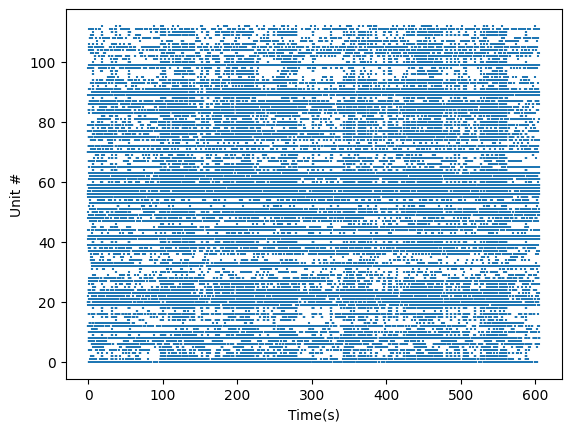

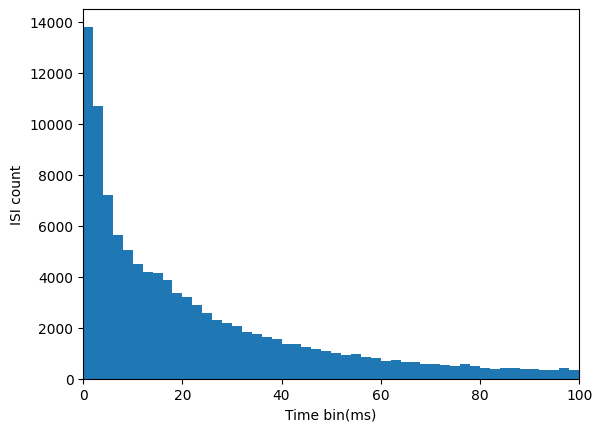

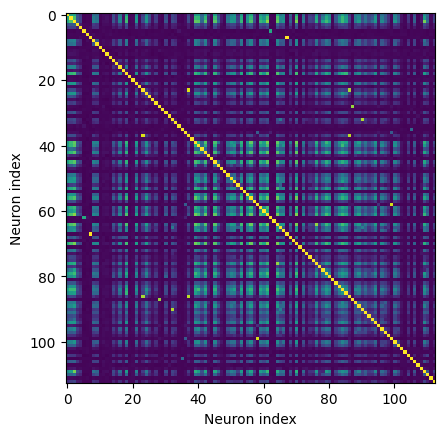

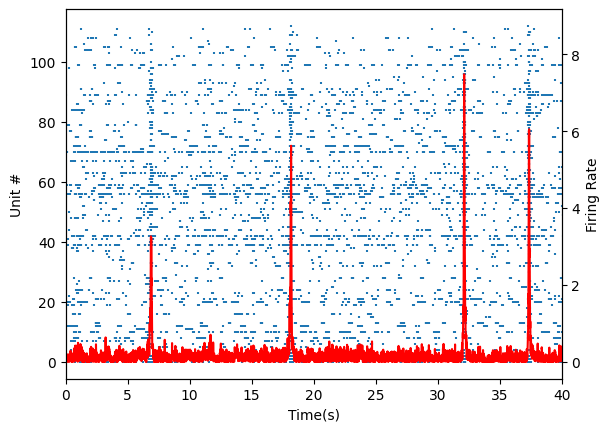

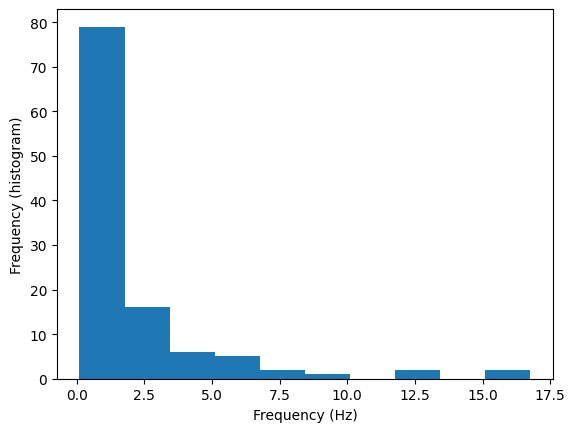

In [4]:
def plot_raster(sd):
    idces, times = sd.idces_times()
    fig, ax = plt.subplots()
    
    ax.scatter(times/1000,idces,marker='|',s=1)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    plt.show()
    
def interspike(sd):
    # Interspike-intervals of 2 select neurons
    isis_raw = sd.interspike_intervals()
    # Remove all isi's greater than 100ms. As there are likely neurons not following periodic firing pattern
    isis=[]
    for i in range(len(isis_raw)):   
        isi=isis_raw[i]
        isis = isis + isi[isi<100].tolist() 
        
    # Plot the isi's
    plt.xlim(0,100)
    plt.hist(isis, bins=50)
    plt.xlabel('Time bin(ms)')
    plt.ylabel('ISI count')
    plt.show()
    
def correlation(sd):
    # Correlation
    corr = np.zeros((sd.N,sd.N)) #inds by inds

    dense_raster = sd.raster(bin_size=1) # in ms
    sigma = 5                            # Blur it
    dense_raster = gaussian_filter1d(dense_raster.astype(float),sigma=sigma) 
    corr=np.corrcoef( dense_raster )
    
    plt.imshow(corr)
    plt.xlabel("Neuron index")
    plt.ylabel("Neuron index")
    plt.show() 
    
def my_raster_analysis(sd, seconds=20, sigma=5):
    # Zoomed Raster and pop rate
    # Get coordinates for raster
    idces, times = sd.idces_times()

    # Get population rate for everything
    pop_rate = sd.binned(bin_size=1)# in ms
    # Lets smooth this to make it neater
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float),sigma=sigma) 
    t = np.linspace(0,sd.length,pop_rate.shape[0])/1000

    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax2 = ax.twinx()
    ax2.plot(t,pop_rate_smooth,c='r')

    ax.set_xlim(0,seconds)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    ax2.set_ylabel('Firing Rate')
    plt.show()
    
plot_raster(sd)
interspike(sd)
correlation(sd)
my_raster_analysis(sd, 40)

plt.hist(sd.rates("Hz"))
plt.ylabel("Frequency (histogram)")
plt.xlabel("Frequency (Hz)")
plt.show()
    

### Data Summary  <font color="purple"> - 2.5 points 

How many electrodes are there on the MEA <font color="purple"><b>(0.5)</b></font> ? <font color="orange"><b>Hint:</b> Check the reading for exact number.</font> How many electrodes are we recording from <font color="purple"><b>(0.5)</b></font> ? How many electrodes *could we record from* <font color="purple"><b>(0.5)</b></font> ? How many neural units were found through spike sorting <font color="purple"><b>(0.5)</b></font> ? How many rows are there in this connectoid's spike raster <font color="purple"><b>(0.5)</b></font> ? 

<font color="green"><b>Answer

<font color="green">Provide an text answers below:

<font color="purple">
    
There are 26,400 electrodes on the MEA.

We are recording from 934 electrodes.

We could record from 1024 electrodes at any given time - there are 1024 so called "readout channels". 

There are 113 neural units found through spike sorting.

There are 113 rows in this connectoid's spike raster.


<font color="green">Provide any code for calculations below:

In [5]:
print("Number of electrodes we are recording from: ",len(electrode_mapping))

print("Number of neural units found through spike sorting: ", len(sd.rates()))

print("Number of rows in this connectoid's spike raster: ", len(sd.rates()))

Number of electrodes we are recording from:  934
Number of neural units found through spike sorting:  113
Number of rows in this connectoid's spike raster:  113


### Organoids in Connectoids  <font color="purple"> - 2 points

Copy the code that graphs the neural units of the connectoid on the MEA. Change the graph so that all the neural units in the left connectoid are green, and all the neural units in the right connectoid are red <font color="purple"><b>(1)</b></font> . How many neural units are in the left organoid <font color="purple"><b>(0.5)</b></font> ? How many neural units are in the right organoid <font color="purple"><b>(0.5)</b></font> ?

<font color="green"><b>Answer

$\mathbf{\#}\text{ Neurons}_{\text{Left Organoid}}= 80$

$\mathbf{\#}\text{ Neurons}_{\text{Right Organoid}}= 33$

<font color="green">Provide code for the graph and calculations below:

# NeuronsLeft Organoid=80
# NeuronsRight Organoid=33


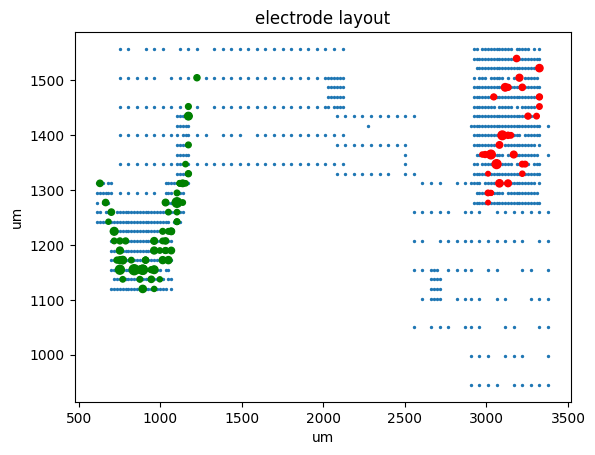

In [3]:
def neuronLayout():
    x = electrode_mapping.x.values
    y = electrode_mapping.y.values
    plt.scatter(x,y,s=2)

    neuron_x = []
    neuron_y = []
    neuron_amp = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
        neuron_amp.append(np.mean(neuron['amplitudes']))

    print(f'# NeuronsLeft Organoid={len([i for i in neuron_x if i<2000])}')
    print(f'# NeuronsRight Organoid={len([i for i in neuron_x if i>=2000])}')
    plt.scatter(neuron_x,neuron_y,s=neuron_amp,c=['green' if x < 2000 else 'red' for x in neuron_x])

    plt.xlabel('um')
    plt.ylabel('um')
    plt.title("electrode layout")
    plt.show()

neuronLayout()

### Connectoid's STTC    <font color="purple"> - 3 points

Let us define the average STTC between a set of neurons to be the sum of all the STTC coefficients between these neurons divided by the total number of coefficients. Note that in this definition of average STTC, we still include the coefficient between a neuron and itself (eg. the value 1) in the calculation.

$$
\dfrac{\sum_{j}^{J}\sum_{i}^{I}\text{STTC}_{ij}}{I\times J}\quad\forall i,j\in\{\text{selected neurons}\}
$$

Calculate the average STTC between all the neurons in the connectoid <font color="purple"><b>(1)</b></font>  . Calculate the average STTC between all neurons in the left organoid <font color="purple"><b>(0.5)</b></font> . Finally, calculated the average STTC between all neurons in the right organoid <font color="purple"><b>(0.5)</b></font> . How does the STTC of the entire connectoid compare to the STTC of the two organoids? Is this what you would expect? Why <font color="purple"><b>(1)</b></font>  ?

<font color="green"><b>Answer

$\text{STTC}_{\text{Connectoid}}= 0.165$

$\text{STTC}_{\text{Left Organoid}}= 0.290$

$\text{STTC}_{\text{Right Organoid}}= 0.050$

<font color="green">Provide you explanation of results below:

<font color="purple"> 
    
The right organoid correlates much less to itself than the average correlation, but the right organoid is more correlated to itself than the average. This isn't quite qhat we would expect. What's expected is that both organoid would be more correlated to themselves than the average across all neural units.
    

<font color="green">Provide any code you ran below:

In [12]:
print("Mean STTC of Connectoid", np.mean( sd.spike_time_tilings() ))

seg = zip(sd.neuron_data[0].values(), range(len(sd.neuron_data[0].values())))
leftNeurons =  [i for n,i in seg if n['position'][0] <= 1995]
seg = zip(sd.neuron_data[0].values(), range(len(sd.neuron_data[0].values())))
rightNeurons = [i for n,i in seg if n['position'][0] > 1995]

leftSTTC = []
for na in leftNeurons :
    for nb in leftNeurons :
        leftSTTC.append(sttc[na,nb])
        
rightSTTC = []
for na in rightNeurons :
    for nb in rightNeurons :
        rightSTTC.append(sttc[na,nb])

print("Mean STTC of Left Organoid", np.mean( leftSTTC  ))
print("Mean STTC of Right Organoid", np.mean( rightSTTC  ))

### Latencies <font color="purple"> - 3 points 

List 5 unique pairs of neural units that have the largest absolute latency values (absolute value of spike latency). For each unique pair, output 2 latency values (depending on which neuron you start with). Plot all 5 of the neural pairs <font color="purple"><b>(2)</b></font>. Do you notice any spatial relationship between the pairs of points <font color="purple"><b>(1)</b></font>?

<font color="orange">
    
<b>Clarification:</b> In the question I state, "List 5 unique pairs of neural units that have the largest absolute latency values". What I am asking for is the absolute mean latency. Consider 2 neural units, n1 and n2 . The "absolute latency value" is calculated by first taking the mean of all the latencies between n1 and n2 , and then taking the absolute value. Do this for all pairs of neural units and then output the neurons with the 5 largest absolute latency values.

<font color="red"> Rememember to tell the students to not consider any latencies that fall outside of 10ms. (See `latencyPlots` code in the source)

<font color="green">Provide explanation below:

<font color="green">Provide code below:

In [ ]:
def latencyPlotCustom(neuron1, neuron2):
    
    # Create plot of neural units with selected neurons for latency calculation in green
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    
    x = electrode_mapping.x.values
    y = electrode_mapping.y.values
    plt.scatter(x,y,s=2)

    neuron_x = []
    neuron_y = []
    neuron_amp = []
    for neuron in sd.neuron_data[0].values():
    #     print("x,y:",neuron['position'])
        neuron_x.append(neuron['position'][0])

        neuron_y.append(neuron['position'][1])
        neuron_amp.append(np.mean(neuron['amplitudes']))

    plt.scatter(neuron_x,neuron_y,s=neuron_amp,c='r')
    plt.scatter(neuron_x,neuron_y,s=neuron_amp,c='r')

    plt.scatter([neuron_x[neuron1]],[neuron_y[neuron1]],s=70,c='g')
    plt.scatter([neuron_x[neuron2]],[neuron_y[neuron2]],s=70,c='g')

    plt.xlabel('um')
    plt.ylabel('um')
    plt.title("electrode layout")
    #plt.show()

In [14]:
top_5_v = [0.0, 0.0, 0.0, 0.0, 0.0]
top_5_crds = [[0,0], [0,0], [0,0], [0,0], [0,0]]
print("starting loop")

for i in range(len(sd.train)):
    lates_n1 = sd.latencies_to_index(i)
    for j in range(len(lates_n1)):
        temp = np.array(lates_n1[j])
        if len(temp) != 0:
            Mi = abs(np.mean(temp))
            coords = [i,j]

            for k in range(5):
                if Mi > top_5_v[k]:
                    top_5_v[k] = Mi
                    top_5_crds[k] = coords
                    break

print(top_5_v)
print(top_5_crds)

for l in range(5):
    latencyPlotCustom(top_5_crds[l][0], top_5_crds[l][1])

[array([   732.55,   1190.55,   1217.95, ..., 601758.85, 601886.8 ,
        602116.8 ]),
 array([  2998.15,   3145.4 ,   4656.5 , ..., 586939.4 , 586952.1 ,
        590143.3 ]),
 array([  3983.65,   4078.2 ,   6750.1 , ..., 586935.55, 586953.35,
        586965.75]),
 array([ 12526.85,  12553.1 ,  12700.9 ,  18200.6 ,  24628.05,  32119.35,
         46258.5 ,  50211.6 ,  50238.05,  50405.9 ,  50433.45,  55070.7 ,
         55094.05,  55137.8 ,  55192.75,  59490.55,  59606.25,  59660.6 ,
         59689.55,  61008.4 ,  62983.65,  63247.8 ,  69217.8 ,  69238.7 ,
         69306.95,  69364.45,  69411.55,  69477.9 ,  80437.9 ,  97891.15,
        100414.7 , 100435.7 , 100443.55, 100449.6 , 100459.55, 102672.1 ,
        102724.75, 107795.3 , 107812.1 , 112174.1 , 113509.9 , 113534.3 ,
        113701.  , 116064.85, 116108.7 , 118115.9 , 123680.65, 123690.  ,
        123691.6 , 126739.95, 126830.1 , 129329.5 , 129465.15, 131672.45,
        136613.6 , 136758.8 , 137286.75, 142133.4 , 142143.15, 1521

## Experiment 

### Hypothesis <font color="purple"> - 4 points

State the general topic that your experiment will revolve around <font color="purple"><b>(1)</b></font>. For example, is this a Hebbian learning experiment? An experiment checking voltage levels? What is the hypothesis that the experiment you are constructing will attempt to test <font color="purple"><b>(1)</b></font>? What justification in literature is there to support your hypothesis <font color="purple"><b>(1)</b></font>? If your experiment goes according to plan what will be the outcome according to your hypothesis <font color="purple"><b>(1)</b></font>?

<font color="green"><b>Answer

### Background Research <font color="purple"> 4 points

#### Literature Review <font color="purple"> - 2 points

Find a paper online that is related to your chosen research topic, but that wasn't provided in any of the HW's. Provide a link to the paper. Briefly summarize the paper (2 sentences). How does does this paper relate to your research? Was reading it helpful? Why/why not?

<font color="green"><b>Answer

#### Method Review <font color="purple"> - 2 points

Find a paper, or other online resource, that describes an analysis method/technique not yet discussed in class (it can build on class material though). Provide a link to the paper. Briefly summarize it (2 sentences). Do you plan to do this analysis technique/method on the resulting data from your experiment? How could this analysis technique/method provide insight?

<font color="green"><b>Answer

### Protocol  <font color="purple"> - 3 points

Describe the protocol for your stimulation experiment using plain english. First state how many electrodes you will be using for stimulation (electrode 1, electrode 2, electrode 3). Then state where the electrodes will be located across **2 organoids**, organoid A and organoid B, that are part of a connectoid. State how many electrodes will be on each organoid. If multiple electrodes are placed on the same organoid, you can request to have electrodes placed in close proximity to eachother. Otherwise, we place the electrode in different regions of the same connectoid.

Describe the stimulation protocol that will be used for each of the electrodes you use for stimulation. Be very explicit in your description. A scientist in our lab should be able to perfectly replicate your protocol with exact parameters purely from this description. State the mV and $\mu$s of the pulses, the frequency (Hz) at which pulses repeat, and the delay inbetween pulses. State the total duration of time you will run the stim protocol (max 5 minutes).

<font color="green"><b>Answer

### Protocol Justification   <font color="purple"> - 2 points
    

Justify why you chose this protocol to test your hypothesis. Refer to this notebook, the reading material, or other onlince sources back your claims. (3-4 sentences)

<font color="green"><b>Answer

### Code    <font color="purple"> - 3 points

Write code that creates a list of stimulation commands that perfectly replicates the protocol you described in words. Then turn this into a stimulation sequence.

<font color="green"><b>Answer

### Graph Stimulation Pattern  <font color="purple"> - 3 points

Create a plot of your stimulation sequence. Create two additional plots where you zoom in on the beginning and end of your stimulation sequence to ensure that it runs according to plan. If you have to for your sequence, create subplots of individual stimulation electrodes to ensure they are correct (this last step won't be graded).

<font color="green"><b>Answer

<font color="green">Explain why the graphs below verify that your code for the stimulation protocol is correct:

<font color="green">Provide the code to create your plots:

### Plot Stim Electrode Layout  <font color="purple"> - 3 points

For your experiment we will be using a special type of connectoid invented by the Haussler lab. These connectoids are called **Delta Connectoids**. Below is a mock example of what an MEA electrode layout could look like when recording from an Delta connectoid.

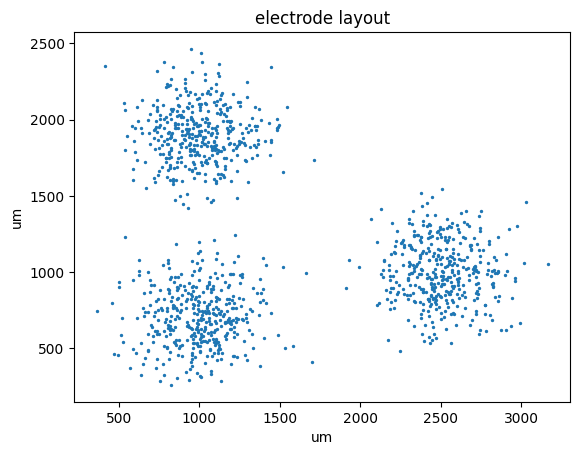

In [8]:
deltaLayout()

How many organoids do you believe are used to create a delta connectoid? 

Copy the code from the graph above. In the graph of the delta connectoid, add colored circles to the graph that represent the neural units you will be stimulating in your experiment. The placement of the neural units (relative to each other) should correspond with where you stated the units would be in your protocol. Remember, you are only allowed to place stimulate neural units from **2 organoids**. Have the color of the neural units correspond to the same color of the unit's firing pattern in the "firing pattern" graph.

<font color="green"><b>Answer

<font color="green">Answer how many organoids are in a delta connectoid

<font color="green">Plot the placement of your stimulation electrodes below.

### Expectations    <font color="purple"> - 1 points

How likely is it that your experiment will go according to plan? If your experiment doesn't go according to plan, what things can you still learn from analysing the data?

<font color="green"><b>Answer